In [10]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
from data_utils import *

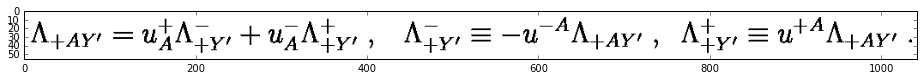

In [8]:
def large_plot(image):
    plt.figure(figsize=(16,16))
    plt.imshow(im)
    plt.show()

im = cv2.imread("data/cropped_images/100f228b42.png")    
im = get_window(im)
large_plot(im)

In [13]:
# Get some information about the height, width of these formulas.
import glob
import cv2
import numpy as np
import time

def formula_size(image):
    """ Returns the patch of image containing non-white pixels, with some padding. """
    mask = np.sum(image, 2) == 0
    horizontal = np.where(np.sum(mask, 0) != 0)[0]
    vertical = np.where(np.sum(mask, 1) != 0)[0]
    width = horizontal[-1] - horizontal[0]
    height = vertical[-1] - vertical[0]
    return height, width

filenames = glob.glob("data/formula_images/*.png")
heights = []
widths = []
times = []

for idx, f in enumerate(filenames[0:1000]):
    tic = time.time()
    image = cv2.imread(f)
    try:
        h, w = formula_size(image)    
    except:
        continue

    heights.append(h)
    widths.append(w)
    toc = time.time()
    times.append(toc - tic)

Avg. ms per image: 79.1056139419
Max dimensions: 316 x 1332


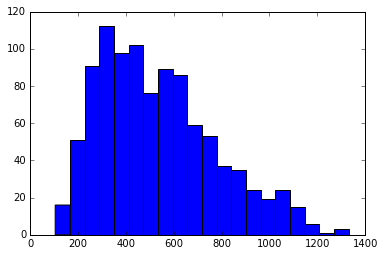

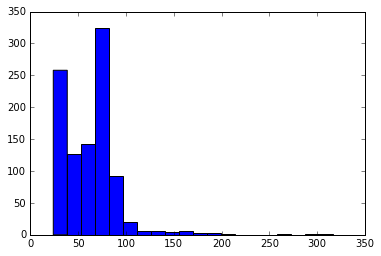

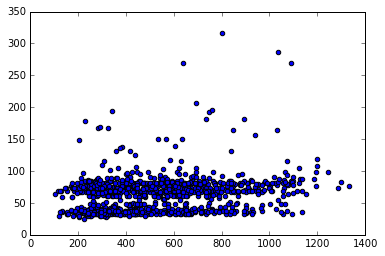

In [14]:
print "Avg. ms per image:", np.mean(times)*1000
print "Max dimensions:", max(heights), "x", max(widths)
plt.hist(widths, 20)
plt.show()

plt.hist(heights, 20)
plt.show()

plt.scatter(widths, heights)
plt.show()